# Pateiktų lygčių sprendimas:

## Nr: 10

$\begin{cases} 9x_1 + 3x_2 - x_3 + 2x_4 = 65 \\ 3x_1 + 11x_2 - 2x_3 - 2x_4 = 27 \\ -x_1 - 2x_2 + 6x_3 - x_4 = -23 \\ 2x_1 -2x_2 - x_3 + 9x_4 = 39 \end{cases}$

## Nr: 11

$\begin{cases} 2x_1 + 5x_2 + x_3 + 2x_4 = 14 \\ -2x_1 + 3x_3 + 5x_4 = 10 \\ x_1 - x_3 + x_4 = 4 \\ 5x_2 + 4x_3 + 7x_4 = 24 \end{cases}$

## Nr: 17

$\begin{cases} 2x_1 + 5x_2 + x_3 + 2x_4 = -1 \\ -2x_1 + 3x_3 + 5x_4 = 7 \\ x_1 - x_3 + x_4 = 3 \\ 5x_2 + 4x_3 + 7x_4 = 4 \end{cases}$

Sprendimas naudojant Gauso metodą:

In [46]:
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

# koeficientu matricos
coef10 = np.matrix([[ 9,  3, -1,  2],
                    [ 3, 11, -2, -2],
                    [-1, -2,  6, -1],
                    [ 2, -2, -1,  9]]).astype(np.float64)
coef11 = np.matrix([[ 2, 5,  1, 2],
                    [-2, 0,  3, 5],
                    [ 1, 0, -1, 1],
                    [ 0, 5,  4, 7]]).astype(np.float64)
coef17 = np.matrix([[-2, 0,  3, 5],
                    [ 2, 5,  1, 2],
                    [ 0, 5,  4, 7],
                    [ 1, 0, -1, 1]]).astype(np.float64)
# laisvuju nariu vektoriai
memb10 = (np.matrix([65,27,-23,39])).transpose()
memb11 = (np.matrix([14,10,4,24])).transpose()
memb17 = (np.matrix([7,-1,4,3])).transpose()

# Pasirinkti varianta
coef = coef10
memb = memb10

n = (np.shape(coef))[0] # lygciu skaicius
nb = (np.shape(coef))[1] # laisvuju nariu skaicius
A1 = np.hstack((coef,memb)) # isplestoji matrica

# Tiesioginis etapas
for i in range (0, n-1):
    for j in range (i+1, n):
        ratio = A1[j,i] / A1[i, i]
        A1[j,i:n+nb]=A1[j,i:n+nb]-A1[i,i:n+nb]*A1[j,i]/A1[i,i]
        A1[j,i] = 0

# Atvirkstinis etapas
x = np.zeros(shape=(n,nb))
for i in range (n-1, -1, -1):
    x[i,:] = (A1[i,n:n+nb] - A1[i,i+1:n] * x[i+1:n,:]) / A1[i,i]

has_solution = True
# Tikriname, ar sistema turi tik vieną sprendinį
if np.any(np.isnan(x)):
    print("Sistema neturi sprendinių.")
    has_solution = False
else:
    unique_solution = True
    for i in range(n):
        if A1[i, i] == 0 and A1[i, -1] != 0:
            unique_solution = False
            break

    if unique_solution:
        print("Sistema turi tik vieną sprendinį.")
    else:
        print("Sistema turi be galo daug sprendinių.")  

if has_solution:
    print("Sprendinys:")
    print(x.transpose()[0])

Sistema turi tik vieną sprendinį.
Sprendinys:
[ 6.  1. -2.  3.]


## Sprendimas naudojant paprastasias iteracijas:

In [47]:
import numpy as np

# Define the coefficient matrix A and the right-hand side vector b
A = np.array([[ 9,  3, -1,  2],
              [ 3, 11, -2, -2],
              [-1, -2,  6, -1],
              [ 2, -2, -1,  9]])

b = np.array([65,27,-23,39])

# Initialize variables
n = A.shape[0]
Aprad = A.copy()

alpha = np.array([100, 20, 1, 1])

Atld = np.diag(1 / np.diag(A)).dot(A) - np.diag(alpha)
btld = np.diag(1 / np.diag(A)).dot(b)

nitmax = 1000
eps = 1e-12
x = np.zeros(n)
x1 = np.zeros(n)

prec = []
for it in range(1, nitmax + 1):
    x1 = (btld - np.dot(Atld, x)) / alpha

    norm_x_x1 = np.linalg.norm(x1 - x) / (np.linalg.norm(x) + np.linalg.norm(x1))
    prec.append(norm_x_x1)

    if norm_x_x1 < eps:
        break

    x = x1

print("Solution:")
print(x)
print("Verification:")
print(Aprad.dot(x) - b)


Solution:
[ 5.99815412  1.00073238 -1.99996636  3.00058133]
Verification:
[-1.32867213e-02  1.28864767e-03  1.61428140e-06  4.18447403e-05]


## Sprendimas QR metodu:
| Užduoties Nr. | Lygčių sistema | b1 | B2 | B3 | Metodas |
| --- | --- | --- | --- | --- | --- |
| 1 | $\begin{cases} 2x_1+5x_2+x_3+2x_4=... \\ -2x_1+3x_3+5x_4=... \\ x_1-x_3+x_4=... \\ -3x_1-4x_2+x_3+x_4=... \end{cases}$ | $\begin{cases} ...=10 \\ ...=6 \\ ...=1 \\ ...=-5 \end{cases}$ | $\begin{cases} ...=74 \\ ...=28 \\ ...=18 \\ ...=-48 \end{cases}$ | $\begin{cases} ...=-0.25 \\ ...=-1 \\ ...=0.5 \\ ...=-0.5 \end{cases}$ | QR |

In [48]:
import numpy as np

# koeficientu matrica
Aorg = np.matrix([[2, 5, 1, 2],
              [-2, 0, 3, 5],
              [1, 0, -1, 1],
              [-3, -4, 1, 1]]).astype(np.float64)

# laisvuju nariu vektoriai
b1 = (np.matrix([10, 6, 1, -5])).transpose().astype(np.float64)
b2 = (np.matrix([74, 28, 18, -48])).transpose().astype(np.float64)
b3 = (np.matrix([-0.25, -1, 0.5, -0.5])).transpose().astype(np.float64)
bAll = [b1, b2, b3]

n = (np.shape(A))[0]  # lygciu skaicius
for b in bAll:
    print("Vektorius")
    print(b.transpose())

    A = Aorg.copy()
    nb = (np.shape(b))[1]  # laisvuju nariu skaicius

    # Tiesioginis etapas
    Q=np.identity(n)
    for i in range (0,n-1):
        z=A[i:n,i]
        zp=np.zeros(np.shape(z)); zp[0]=np.linalg.norm(z)
        omega=z-zp; omega=omega/np.linalg.norm(omega)
        Qi=np.identity(n-i)-2*omega*omega.transpose()
        A[i:n,:]=Qi.dot(A[i:n,:])
        Q[:,i:n]=Q[:,i:n].dot(Qi)

    # Atvirkstinis etapas
    b1=Q.transpose().dot(b);
    x=np.zeros(shape=(n,nb));
    for i in range (n-1,-1,-1):    # range pradeda n-1 ir baigia 0 (trecias parametras yra zingsnis)
        x[i,:]=(b1[i,:]-A[i,i+1:n]*x[i+1:n,:])/A[i,i];

    # Tikriname, ar sistema turi tik vieną sprendinį
    has_solution = True
    if np.any(np.isnan(x)):
        print("Sistema neturi sprendinių.")
        has_solution = False
    else:
        unique_solution = True
        for i in range(n):
            if A[i, i] == 0 and b[i] != 0:
                unique_solution = False
                break

        if unique_solution:
            print("Sistema turi tik vieną sprendinį.")
        else:
            print("Sistema turi be galo daug sprendinių.")

    if has_solution:
        print("Sprendinys:")
        print(x.transpose()[0])
    print("--------------------")

Vektorius
[[10.  6.  1. -5.]]
Sistema turi tik vieną sprendinį.
Sprendinys:
[1. 1. 1. 1.]
--------------------
Vektorius
[[ 74.  28.  18. -48.]]
Sistema turi tik vieną sprendinį.
Sprendinys:
[10.  7.  1.  9.]
--------------------
Vektorius
[[-0.25 -1.    0.5  -0.5 ]]
Sistema turi tik vieną sprendinį.
Sprendinys:
[ 5.00000000e-01 -2.50000000e-01  1.66237745e-15 -2.71947991e-16]
--------------------


# Netiesinių lygčių sistemų sprendimas

$\begin{cases} \frac{10x_1}{x^2_2+1}+x^2_1-x^2_2=0 \\ x^2_1+2x^2_2-32=0  \end{cases}$

## Atvaizdavimas

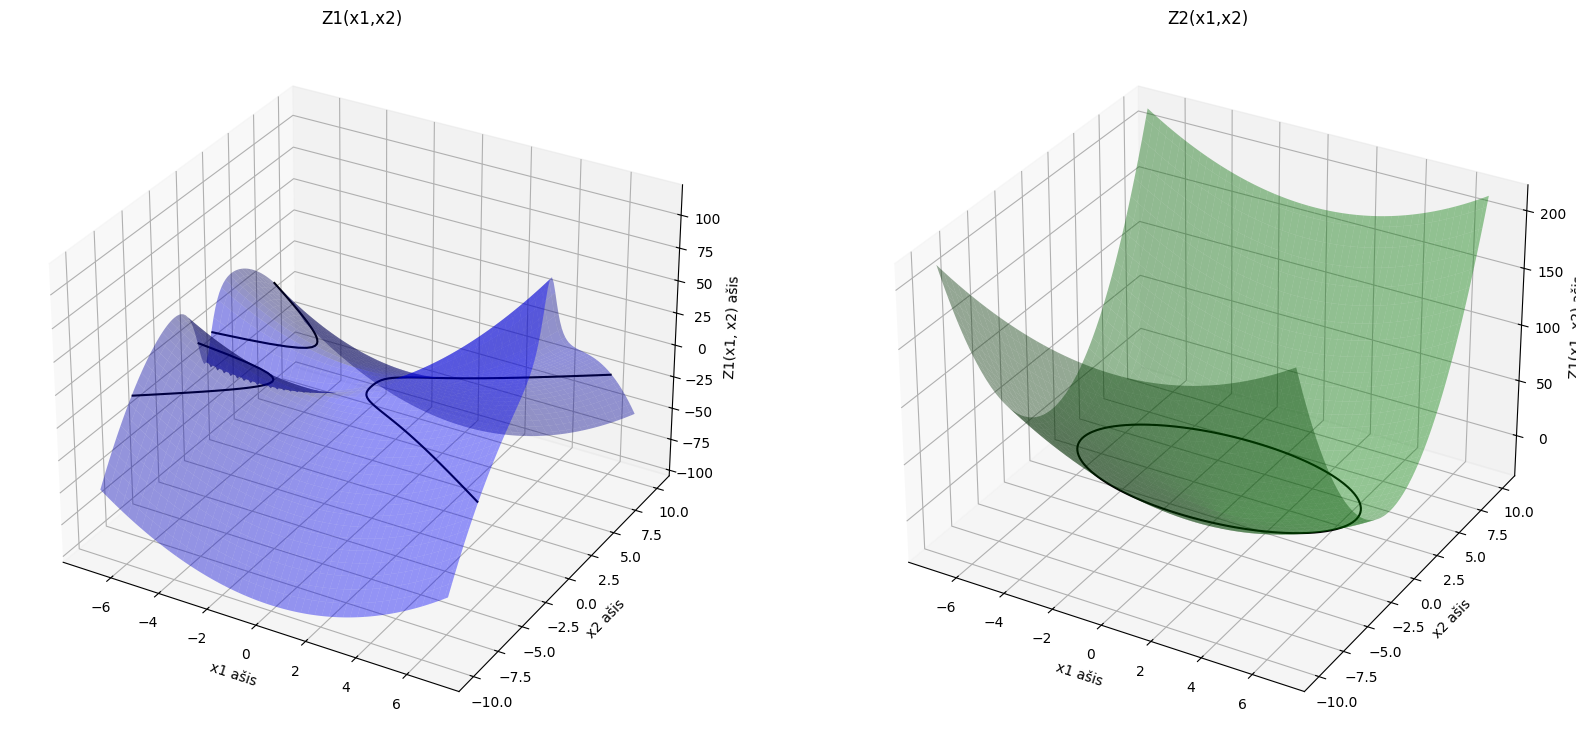

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib import cm
from mpl_toolkits import mplot3d
import math

def PrintGraph(functions, xInterval, yInterval, xStep, yStep, count):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1, projection="3d", title="Z1(x1,x2)", xlabel="x1 ašis", ylabel="x2 ašis",
                          zlabel="Z1(x1, x2) ašis")
    ax2 = fig.add_subplot(1, 2, 2, projection="3d", title="Z2(x1,x2)", xlabel="x1 ašis", ylabel="x2 ašis",
                          zlabel="Z1(x1, x2) ašis")
    plt.draw()
    x_data = np.linspace(xInterval[0], xInterval[1], count)
    y_data = np.linspace(yInterval[0], yInterval[1], count)
    X, Y = np.meshgrid(x_data, y_data)
    fun = lambda x: np.array(
        [(10 * x[0]) / (x[1] ** 2 + 1) + x[0] ** 2 - x[1]  ** 2,
                    x[0] ** 2 + 2 * x[1] ** 2 - 32]).astype(float)
    Z = fun([X, Y])
    ax1.plot_surface(X, Y, Z[0], color="blue", alpha=0.4)
    ax1.contour(x_data, y_data, Z[0], [0], colors="black")
    ax2.plot_surface(X, Y, Z[1], color="green", alpha=0.4)
    ax2.contour(x_data, y_data, Z[1], [0], colors="black")
    plt.show()

ZF = np.array([((10 * x[0]) / (x[1] ** 2 + 1)) + x[0] ** 2 - x[1]  ** 2,
                x[0] ** 2 + 2 * x[1] ** 2 - 32])

PrintGraph(ZF, (-7,7), (-10, 10), 1, 1, 100)

## Sprendimas grafiniu būdu:

[3.00962043 3.38690012]


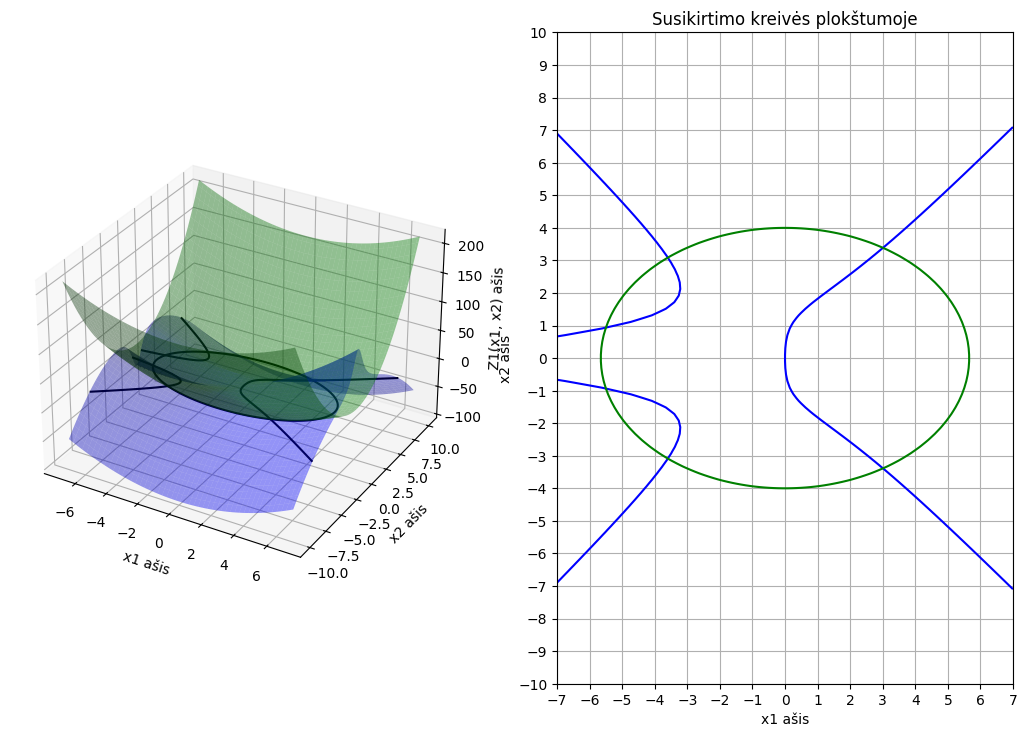

In [50]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

def PrintGraph(xInt, yInt, xStep, yStep, count, M, relative):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 3, 1, projection="3d", xlabel="x1 ašis", ylabel="x2 ašis",
                          zlabel="Z1(x1, x2) ašis")
    ax2 = fig.add_subplot(1, 3, 2, title="Susikirtimo kreivės plokštumoje", aspect=1,
                          xticks=np.arange(xInt[0], xInt[1] + 1, xStep),
                          yticks=np.arange(yInt[0], yInt[1] + 1, yStep), xlabel="x1 ašis", ylabel="x2 ašis")
    plt.draw()
    x_data = np.linspace(xInt[0], xInt[1], count)
    y_data = np.linspace(yInt[0], yInt[1], count)
    X, Y = np.meshgrid(x_data, y_data)
    fun = lambda x: np.array(
        [(10 * x[0]) / (x[1] ** 2 + 1) + x[0] ** 2 - x[1]  ** 2,
                    x[0] ** 2 + 2 * x[1] ** 2 - 32]).astype(float)
    Z = fun([X, Y])
    print(sc.optimize.fsolve(fun, relative))
    ax1.plot_surface(X, Y, Z[0], color="blue", alpha=0.4)
    ax1.contour(x_data, y_data, Z[0], [0], colors="black")
    ax1.plot_surface(X, Y, Z[1], color="green", alpha=0.4)
    ax1.contour(x_data, y_data, Z[1], [0], colors="black")
    ax2.contour(x_data, y_data, Z[0], [0], colors="blue")
    ax2.contour(x_data, y_data, Z[1], [0], colors="green")
    ax2.grid()
    plt.show()


x = [sp.Symbol("x1"), sp.Symbol("x2")]
M = np.array([((10 * x[0]) / (x[1] ** 2 + 1)) + x[0] ** 2 - x[1]  ** 2,
                x[0] ** 2 + 2 * x[1] ** 2 - 32])
relative = np.array([4, 4]).astype(float)
PrintGraph((-7, 7), (-10, 10), 1, 1, 100, M, relative)

## Stačiakampio tinklelio sudarymas

| Nr. | Lygčių sistema | Metodas
| --- | --- | --- |
| 1 | $\begin{cases} \frac{10x_1}{x^2_2+1}+x^2_1-x^2_2=0 \\ x^2_1+2x^2_2-32=0  \end{cases}$ | Niutono |

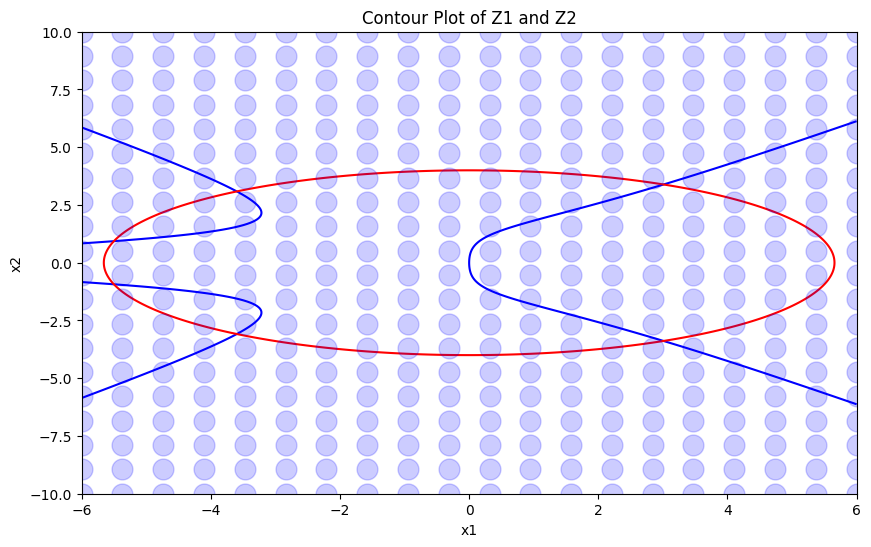

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function Z1
def Z1(x1, x2):
    return (10*x1) / (x2**2+1) + x1**2 - x2**2

# Define the function Z2
def Z2(x1, x2):
    return x1**2 + 2*x2**2 - 32

# Include the newton_method function
def newton_method(f, df, x0, max_iter=300, tol=1e-10):
    x = x0
    for _ in range(max_iter):
        dx = np.linalg.solve(df(x), -f(x))
        x = x + dx
        if np.linalg.norm(dx) < tol:
            return x
    return x

# Define the non-linear functions
def f(x):
    return np.array([x[0] * x[1] - 10, (x[0] / 4) ** 4 + x[1] ** 2 - x[0] * x[1] - 10])

def df(x):
    return np.array([[x[1], x[0]], [3 * x[0] ** 3 - x[1], 2 * x[1] - x[0]]])

# Create a grid of x1 and x2 values for the function graphs
x1_values = np.linspace(-6, 6, 400)
x2_values = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1_values, x2_values)

# Compute the corresponding Z1 and Z2 values
Z1_values = Z1(X1, X2)
Z2_values = Z2(X1, X2)

# Define the grid of initial guesses
x_values = np.linspace(-6, 6, 20)
y_values = np.linspace(-10, 10, 20)
solutions = []

for x0 in x_values:
    for y0 in y_values:
        initial_guess = np.array([x0, y0])
        solution = newton_method(f, df, initial_guess)
        solutions.append((initial_guess, solution))

# Create a single plot for Z1 and Z2
plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z1_values, levels=[0], colors='blue')
plt.contour(X1, X2, Z2_values, levels=[0], colors='red')

# Mark the solutions on the contour plots with quarters' colors
for initial_guess, solution in solutions:
    plt.plot(initial_guess[0], initial_guess[1], 'bo', markersize=15, alpha=0.2)
    if np.linalg.norm(initial_guess - solution) < 1e-5:
        plt.plot(solution[0], solution[1], 'ro', markersize=5)
    # Annotate the points with their coordinates
    #plt.annotate(f"({initial_guess[0]:.2f}, {initial_guess[1]:.2f})", (initial_guess[0], initial_guess[1]), fontsize=8, ha='right', va='bottom')

plt.title('Contour Plot of Z1 and Z2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Verify the solutions
# for initial_guess, solution in solutions:
#     f_values = f(solution)
#     if np.all(np.abs(f_values) < 1e-10):
#         print(f'Solution {solution} is verified.')
#     else:
#         print(f'Solution {solution} is not verified.')

# Optimizavimas

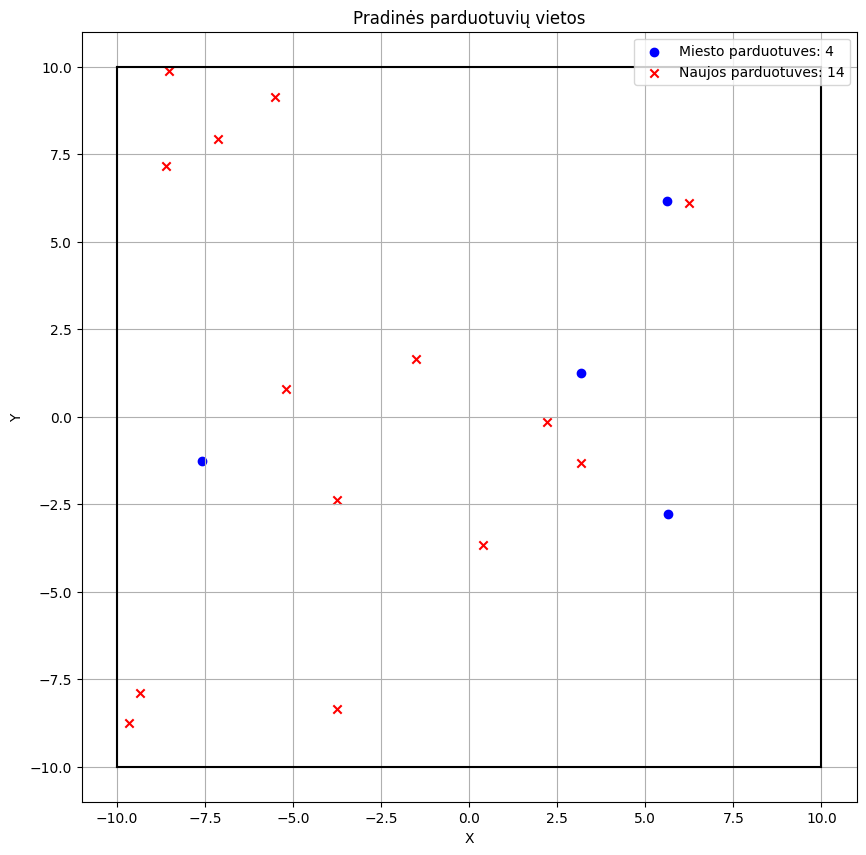

2.17939158785017
0.17898883938549487


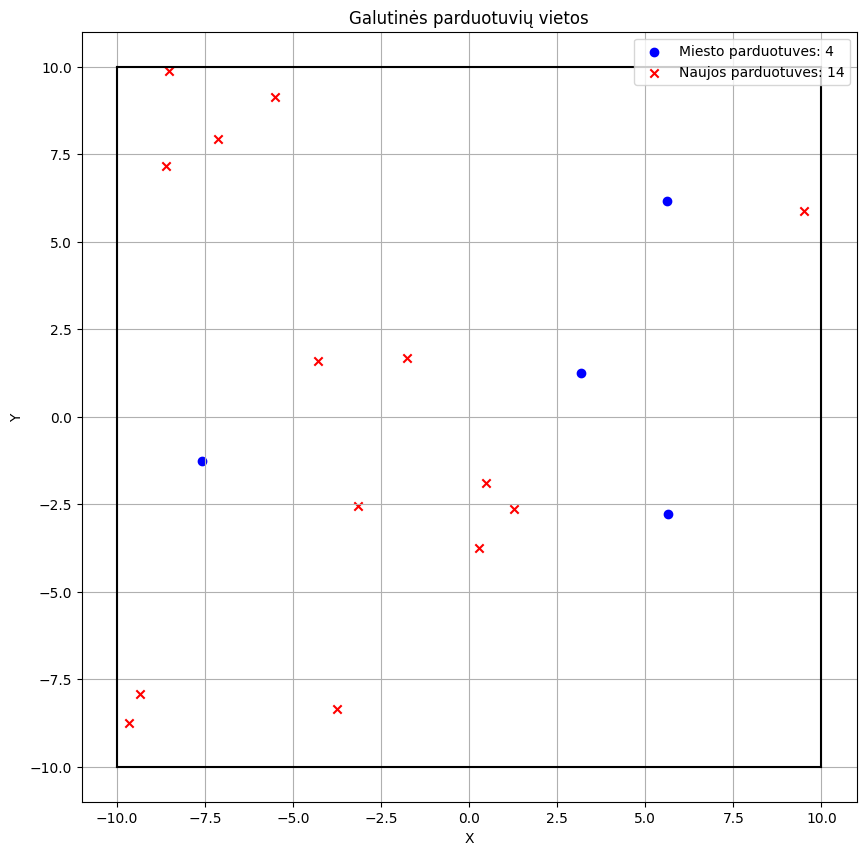

Esamos parduotuvės: 4
[[ 5.62570472  6.16708672]
 [ 5.64802479 -2.76780773]
 [ 3.18651147  1.2409357 ]
 [-7.57582987 -1.26342071]]
Naujos parduotuvės: 14
[[-9.33299043 -7.90961043]
 [ 1.27718962 -2.63103894]
 [-8.51147306  9.86572794]
 [-1.77042413  1.67006049]
 [-5.51940916  9.13640122]
 [ 9.50579786  5.88885051]
 [-3.16244537 -2.56258383]
 [-3.75216566 -8.34459057]
 [-7.11942397  7.92268397]
 [-4.29524914  1.58996724]
 [ 0.48146158 -1.90588773]
 [-9.64494483 -8.75662648]
 [ 0.26872905 -3.73737556]
 [-8.60664562  7.15301419]]


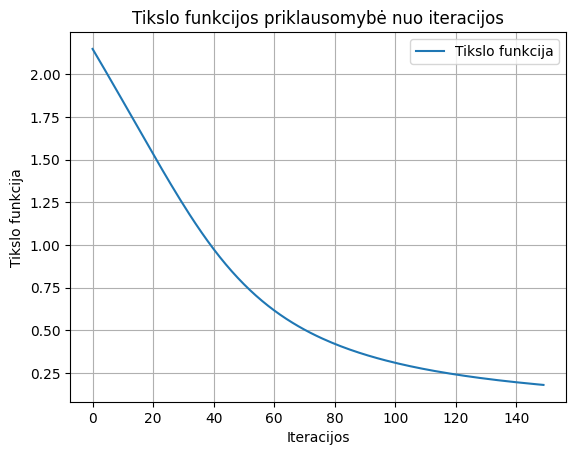

In [55]:

from cProfile import label
import numpy as np
import matplotlib.pyplot as plt

# Settings
CITY_SIZE_X = (-10, 10)
CITY_SIZE_Y = (-10, 10)
existing_stores_count = np.random.randint(3, 20)
new_stores_count = np.random.randint(3, 20)
learning_rate = 0.1
num_iterations = 150

def distance_to_location_cost(x1, y1, x2, y2):
    return np.exp(-0.2 * ((x1 - x2)**2 + (y1 - y2)**2))

def distance_to_boundary_cost(x, y, xr, yr):
    if x < CITY_SIZE_X[0] or x > CITY_SIZE_X[1] or y < CITY_SIZE_Y[0] or y > CITY_SIZE_Y[1]:
        return np.exp(0.25 * (x - xr)**2 + (y - yr)**2 - 1)
    else:
        return 0
    
def closest_point_to_edge(x, y):
    x = max(CITY_SIZE_X[0], min(x, CITY_SIZE_X[1]))
    y = max(CITY_SIZE_Y[0], min(y, CITY_SIZE_Y[1]))
    
    if y < (CITY_SIZE_Y[0] + CITY_SIZE_Y[1]) / 2:
        return (x, CITY_SIZE_Y[0])
    else:
        return (x, CITY_SIZE_Y[1]) if y >= (CITY_SIZE_Y[0] + CITY_SIZE_Y[1]) / 2 else (CITY_SIZE_X[0], y) if x < (CITY_SIZE_X[0] + CITY_SIZE_X[1]) / 2 else (CITY_SIZE_X[1], y)

def objective(existing_locations, new_locations):
    prices = []
    for new_location in new_locations:
        price = 0
        for existing_location in existing_locations:
            distance = distance_to_location_cost(new_location[0], new_location[1], existing_location[0], existing_location[1])
            price += distance
        closest_point = closest_point_to_edge(new_location[0], new_location[1])
        location_cost = distance_to_boundary_cost(new_location[0], new_location[1], closest_point[0], closest_point[1])

        prices.append(price + location_cost)

    return np.sum(prices)

def visualisation(existing_stores, new_stores, title):
    # Visualize the results
    plt.figure(figsize=(10, 10))
    plt.scatter(existing_stores[:, 0], existing_stores[:, 1], color='blue', marker='o', label=f'Miesto parduotuves: {len(existing_stores)}')
    plt.scatter(new_stores[:, 0], new_stores[:, 1], color='red', marker='x', label=f'Naujos parduotuves: {len(new_stores)}')
    # Draw city boundaries
    plt.plot([CITY_SIZE_X[0], CITY_SIZE_X[1]], [CITY_SIZE_Y[0], CITY_SIZE_Y[0]], color='black')
    plt.plot([CITY_SIZE_X[0], CITY_SIZE_X[1]], [CITY_SIZE_Y[1], CITY_SIZE_Y[1]], color='black')
    plt.plot([CITY_SIZE_X[0], CITY_SIZE_X[0]], [CITY_SIZE_Y[0], CITY_SIZE_Y[1]], color='black')
    plt.plot([CITY_SIZE_X[1], CITY_SIZE_X[1]], [CITY_SIZE_Y[0], CITY_SIZE_Y[1]], color='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def main(): 
    existing_stores = np.random.rand(existing_stores_count, 2) * (CITY_SIZE_X[1] - CITY_SIZE_X[0]) + CITY_SIZE_X[0]
    new_stores = np.random.rand(new_stores_count, 2) * (CITY_SIZE_X[1] - CITY_SIZE_X[0]) + CITY_SIZE_X[0]

    visualisation(existing_stores, new_stores, "Pradinės parduotuvių vietos")
    print(objective(existing_stores, new_stores))

    objective_values = []

    for i in range(num_iterations):
        grad = np.zeros((new_stores_count,2))
        for j in range(new_stores_count):
            for k in range(2):
                perturbation = np.zeros((new_stores_count,2))
                perturbation[j,k] = 1e-5
                f_plus = objective(existing_stores, new_stores + perturbation)
                f_minus = objective(existing_stores, new_stores - perturbation)
                grad[j][k] = (f_plus - f_minus) / (2 * 1e-5)

        new_stores -= learning_rate * grad
        objective_value = objective(existing_stores, new_stores)
        objective_values.append(objective_value)



    print(objective(existing_stores, new_stores))
    visualisation(existing_stores, new_stores, "Galutinės parduotuvių vietos")

    print(f"Esamos parduotuvės: {existing_stores_count}")
    print(existing_stores)
    print(f"Naujos parduotuvės: {new_stores_count}")
    print(new_stores)

    # Create and plot the objective function graph
    plt.figure()
    plt.plot(range(num_iterations), objective_values, label="Tikslo funkcija")
    plt.xlabel('Iteracijos')
    plt.ylabel('Tikslo funkcija')
    plt.legend(loc='upper right')
    plt.title('Tikslo funkcijos priklausomybė nuo iteracijos')
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()